<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-21 13:08:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.9MB/s    in 2.6s    

2025-04-21 13:08:17 (57.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


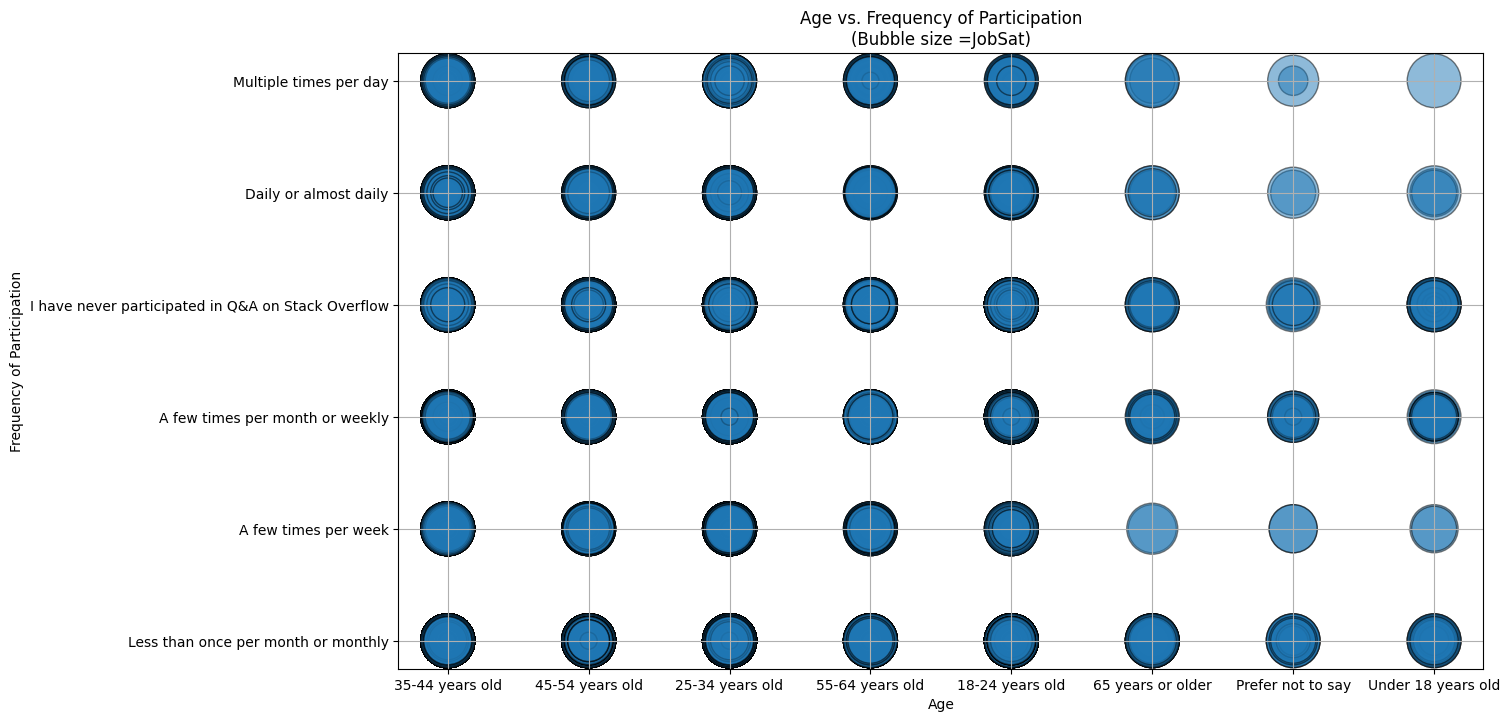

In [13]:
##Write your code here
df_bubble = df[['Age', 'SOPartFreq', 'JobSat']].dropna()
plt.figure(figsize=(14, 8))
plt.scatter(
    df_bubble['Age'],
    df_bubble['SOPartFreq'],
    s=df_bubble['JobSat']*150,  # bubble size
    alpha=0.5,
    edgecolors='black'
)

plt.title('Age vs. Frequency of Participation\n(Bubble size =JobSat)')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


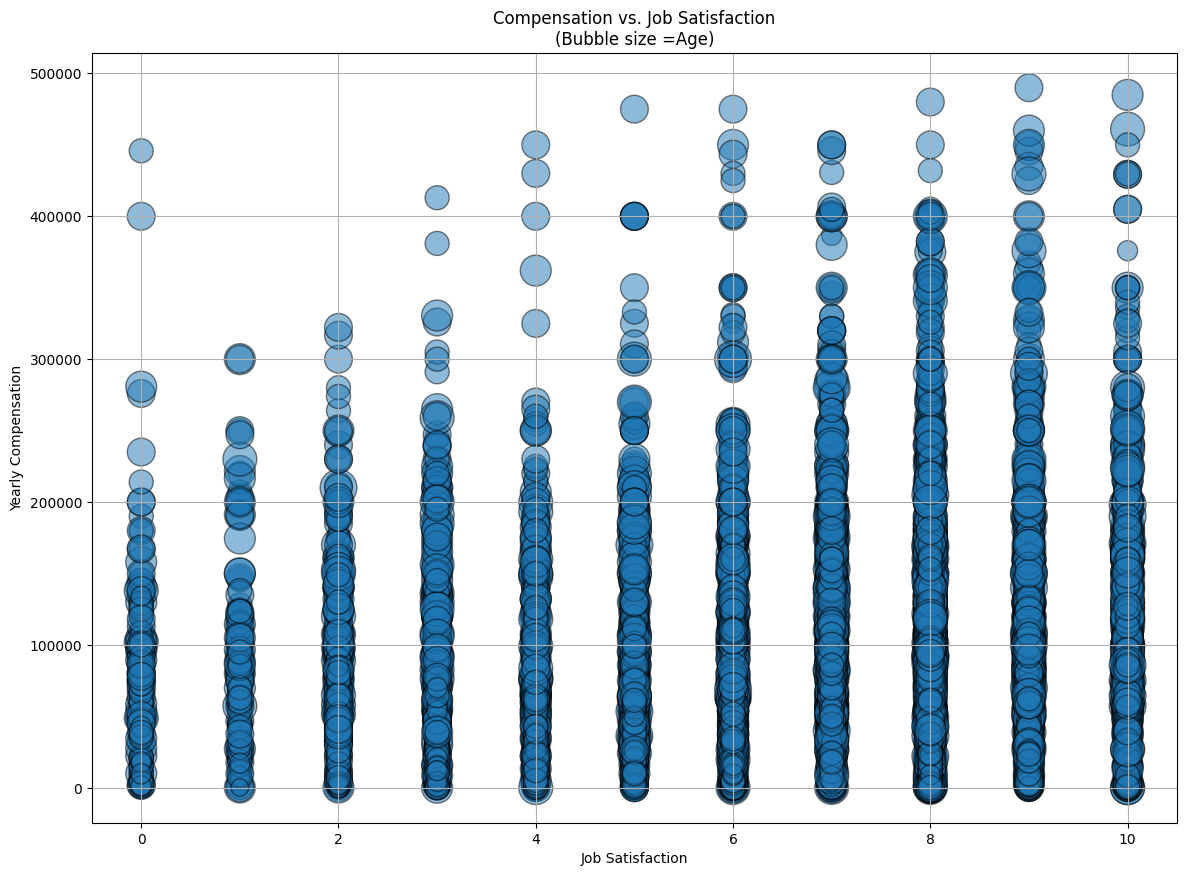

In [20]:
##Write your code here
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None,
    'NA': None
}
df['Age_num'] = df['Age'].map(age_mapping)
df_plot = df[['Age_num','JobSat','ConvertedCompYearly']].dropna()
df_plot = df_plot[df_plot['ConvertedCompYearly'] < 500000]

plt.figure(figsize=(14, 10))
plt.scatter(
    df_plot['JobSat'],
    df_plot['ConvertedCompYearly'],
    s=df_plot['Age_num']*10,  # bubble size
    alpha=0.5,
    edgecolors='black'
)

plt.title('Compensation vs. Job Satisfaction\n(Bubble size =Age)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensation')
plt.grid(True)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



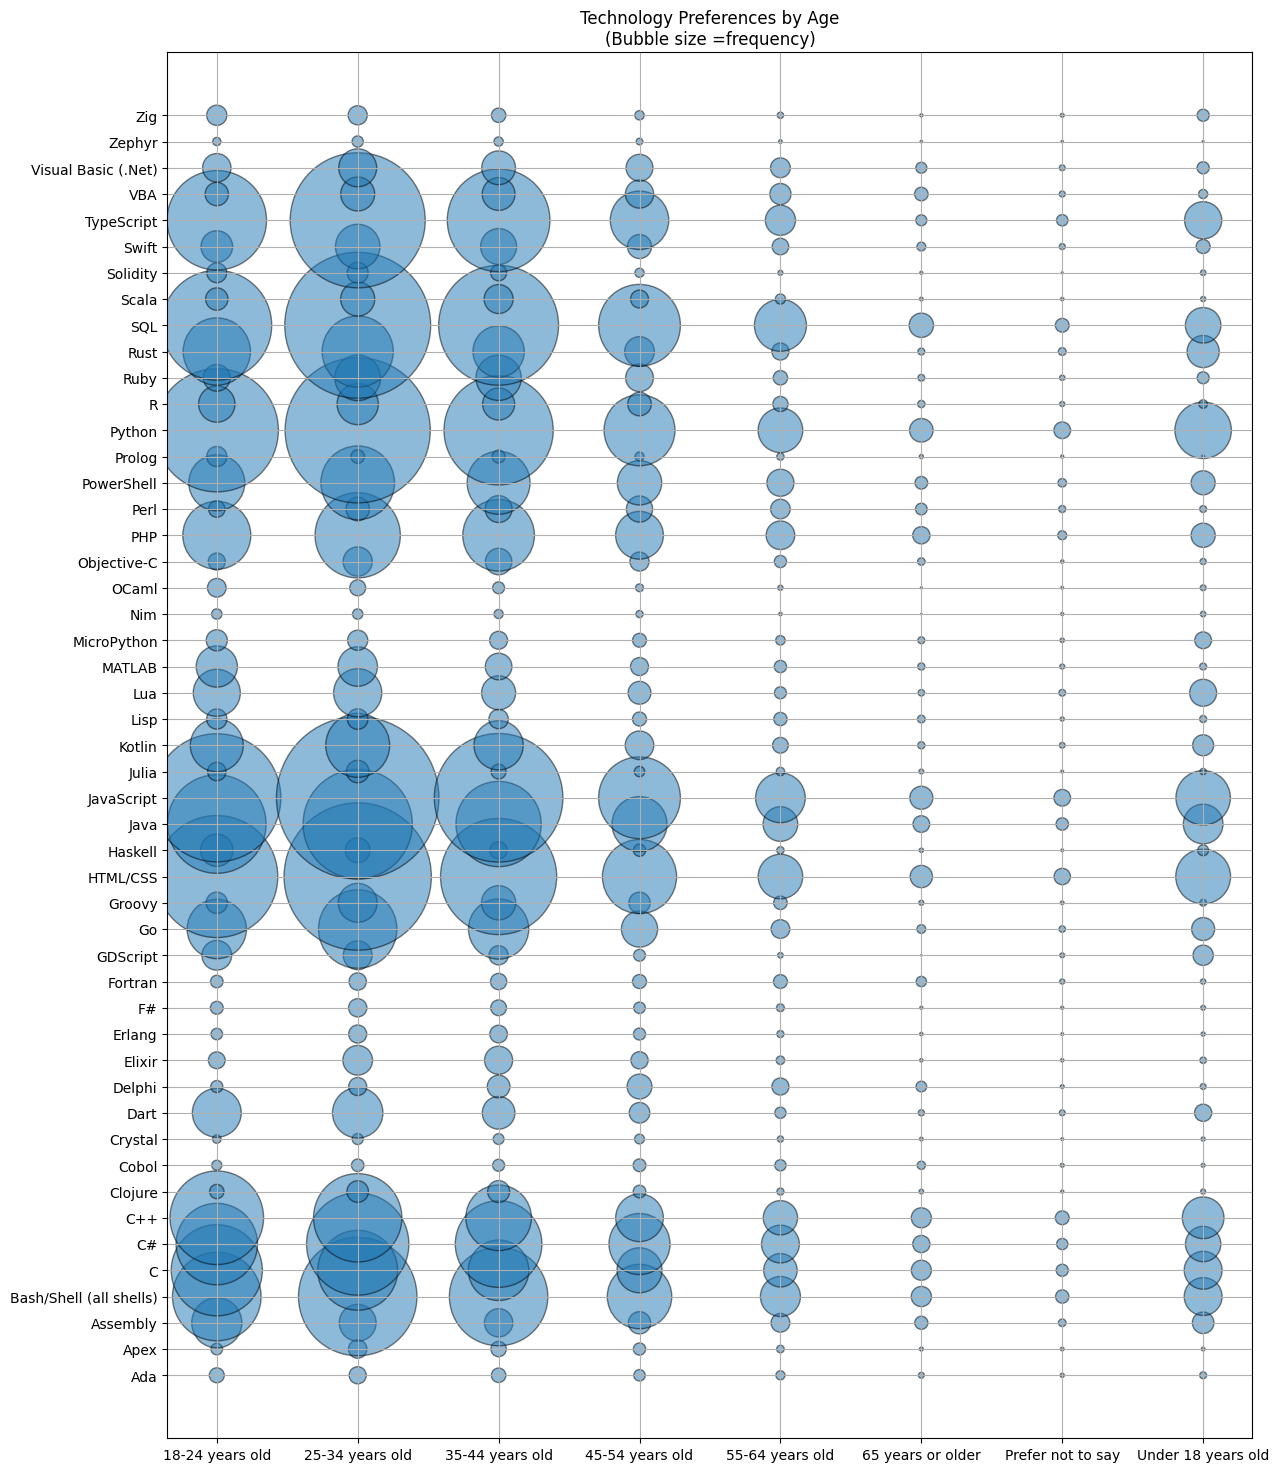

In [30]:
##Write your code here
df_lang = df.assign(language=df['LanguageHaveWorkedWith'].str.split(';')).explode('language')
lang_age_freq = df_lang.groupby(['Age', 'language']).size().reset_index(name='Count')
df_plot = lang_age_freq[['language','Age','Count']].dropna()
df_plot
plt.figure(figsize=(14, 18))
plt.scatter(
    df_plot['Age'],
    df_plot['language'],
    s=df_plot['Count'],  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Technology Preferences by Age\n(Bubble size =frequency)')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


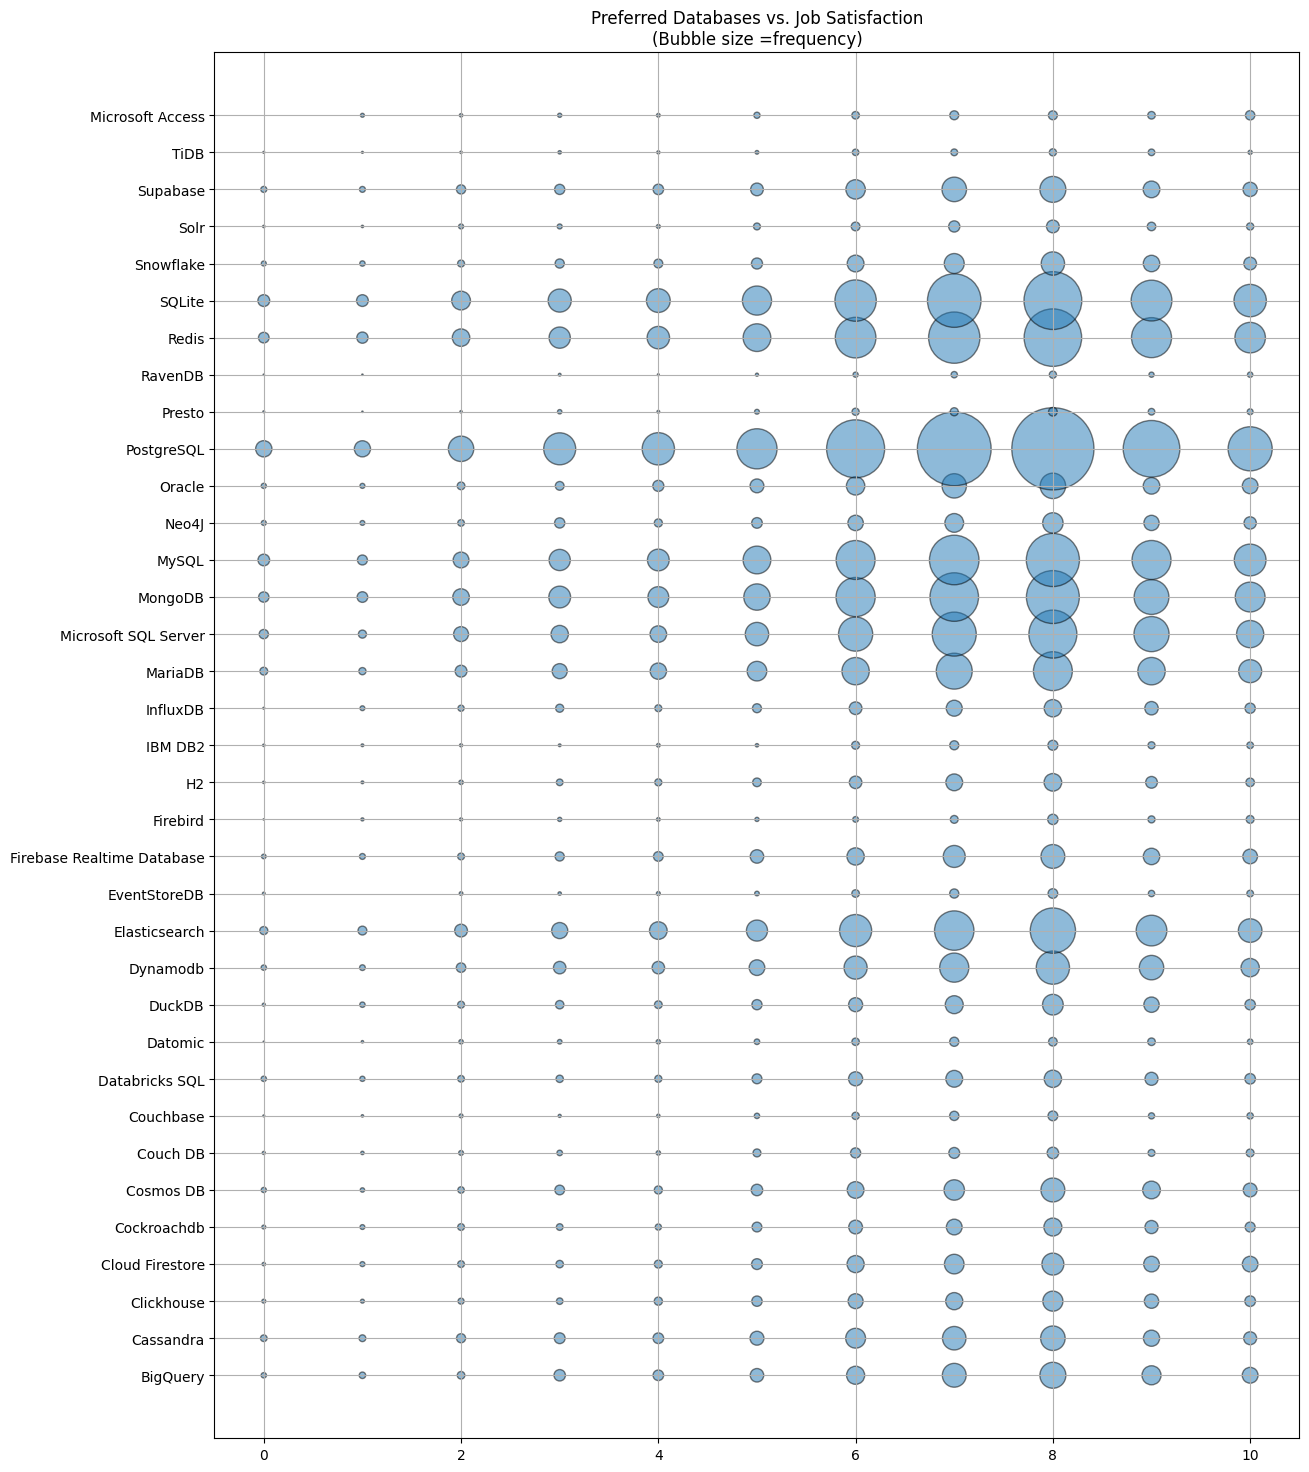

In [31]:
##Write your code here
df_db = df.assign(database=df['DatabaseWantToWorkWith'].str.split(';')).explode('database')
db_age_freq = df_db.groupby(['JobSat', 'database']).size().reset_index(name='Count')
df_plot = db_age_freq[['database','JobSat','Count']].dropna()
df_plot
plt.figure(figsize=(14, 18))
plt.scatter(
    df_plot['JobSat'],
    df_plot['database'],
    s=df_plot['Count'],  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Preferred Databases vs. Job Satisfaction\n(Bubble size =frequency)')
plt.grid(True)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


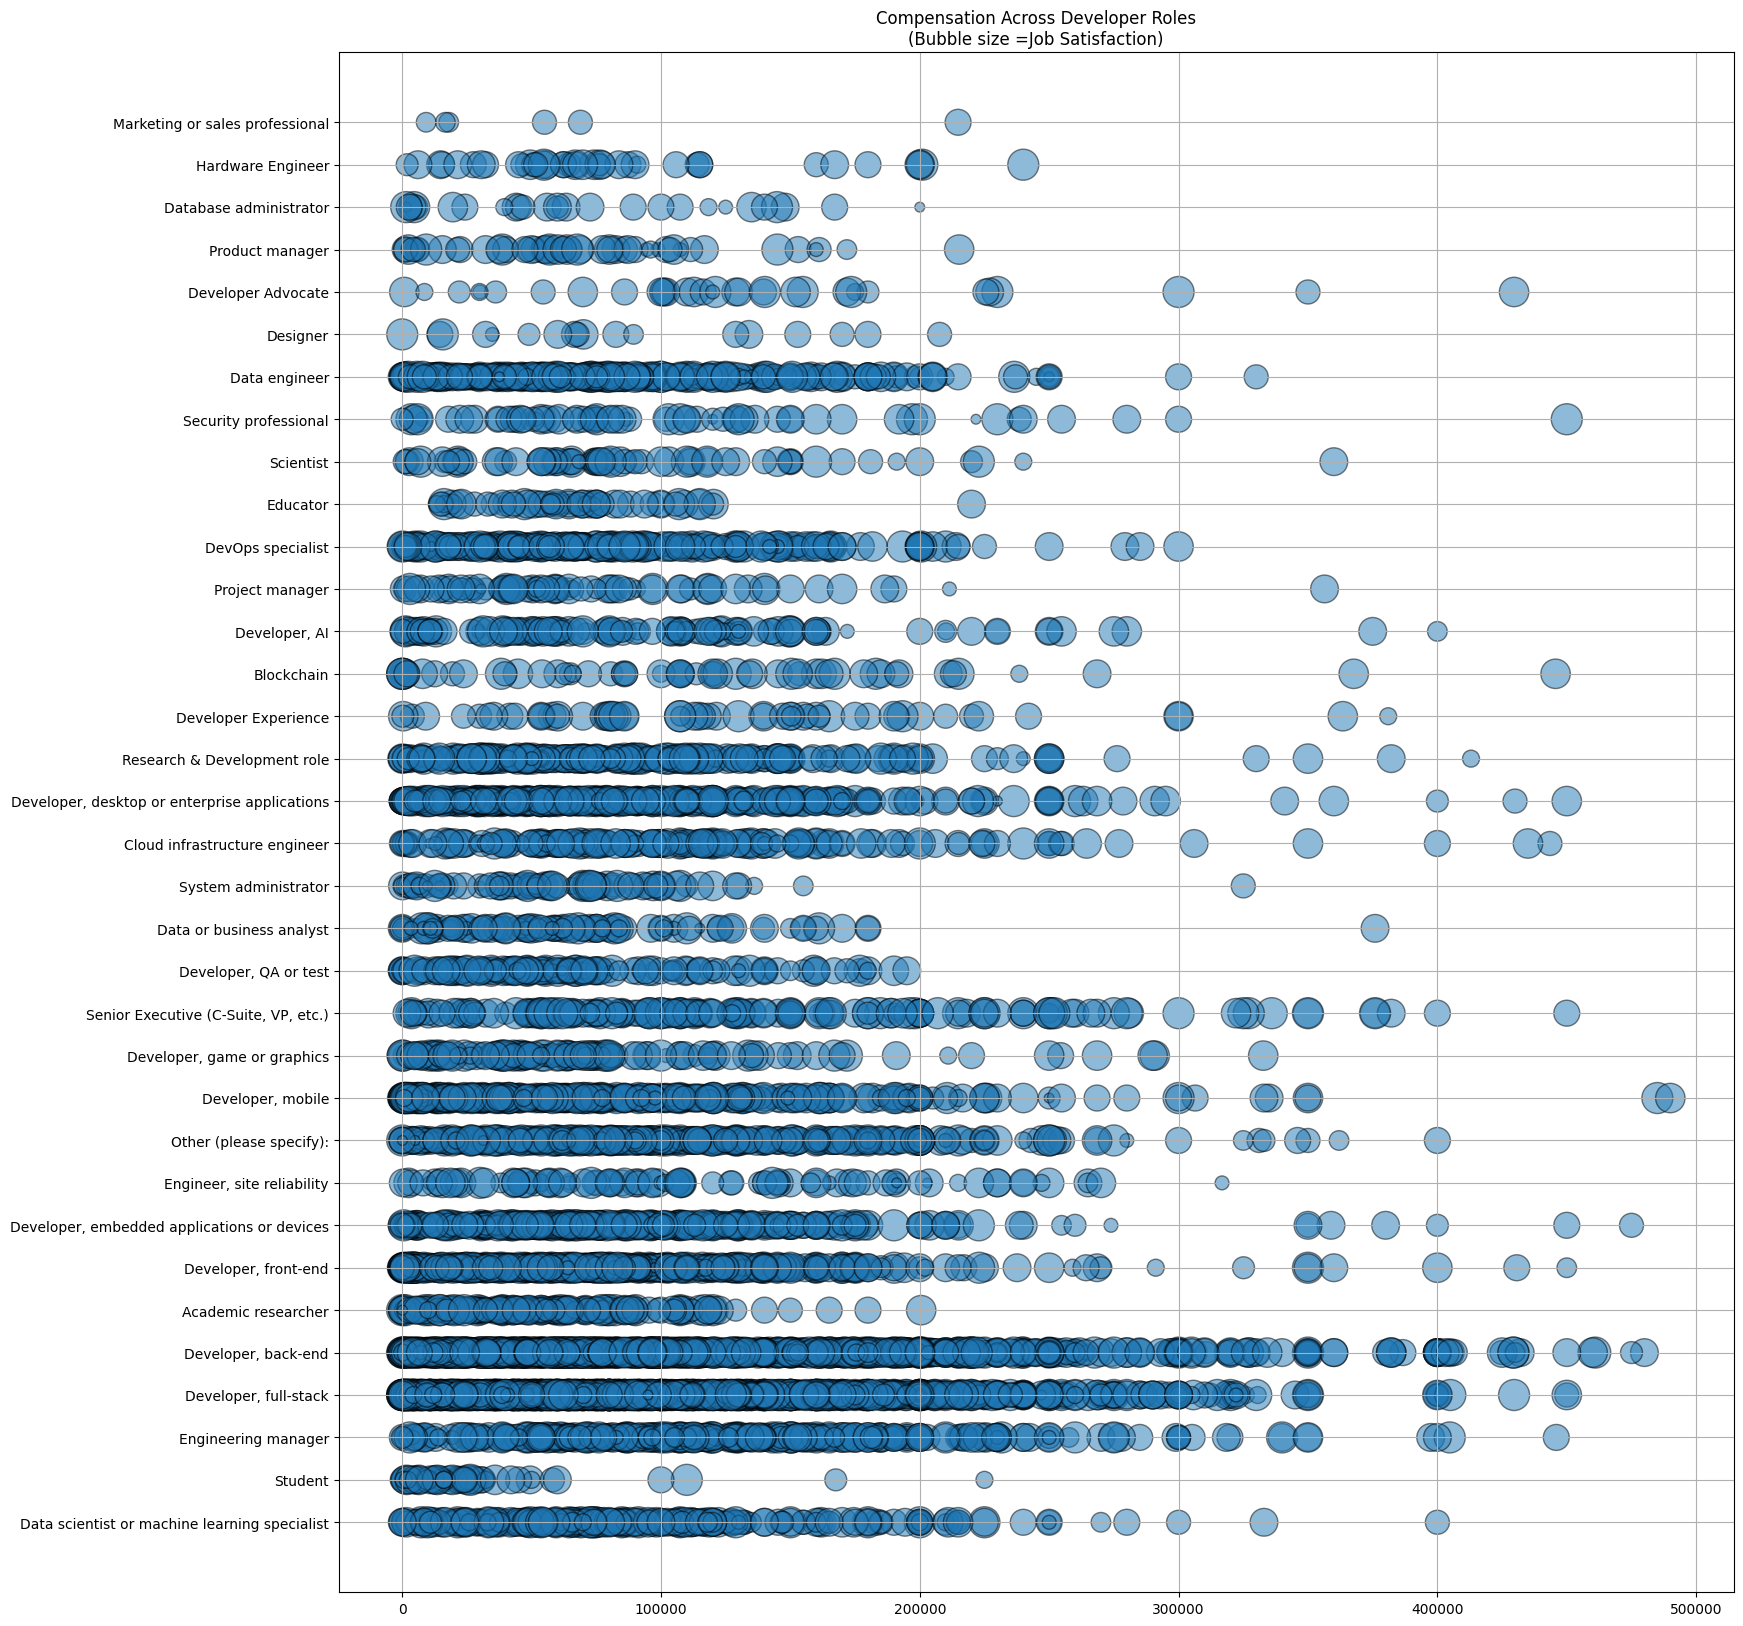

In [40]:
##Write your code here
df_dev = df.assign(dev_type=df['DevType'].str.split(';')).explode('dev_type')

df_plot = df_dev[['dev_type','JobSat','ConvertedCompYearly']].dropna()
df_plot = df_plot[df_plot['ConvertedCompYearly'] < 500000]
plt.figure(figsize=(18, 20))
plt.scatter(
    df_plot['ConvertedCompYearly'],
    df_plot['dev_type'],
    s=df_plot['JobSat']*50,  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Compensation Across Developer Roles\n(Bubble size =Job Satisfaction)')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


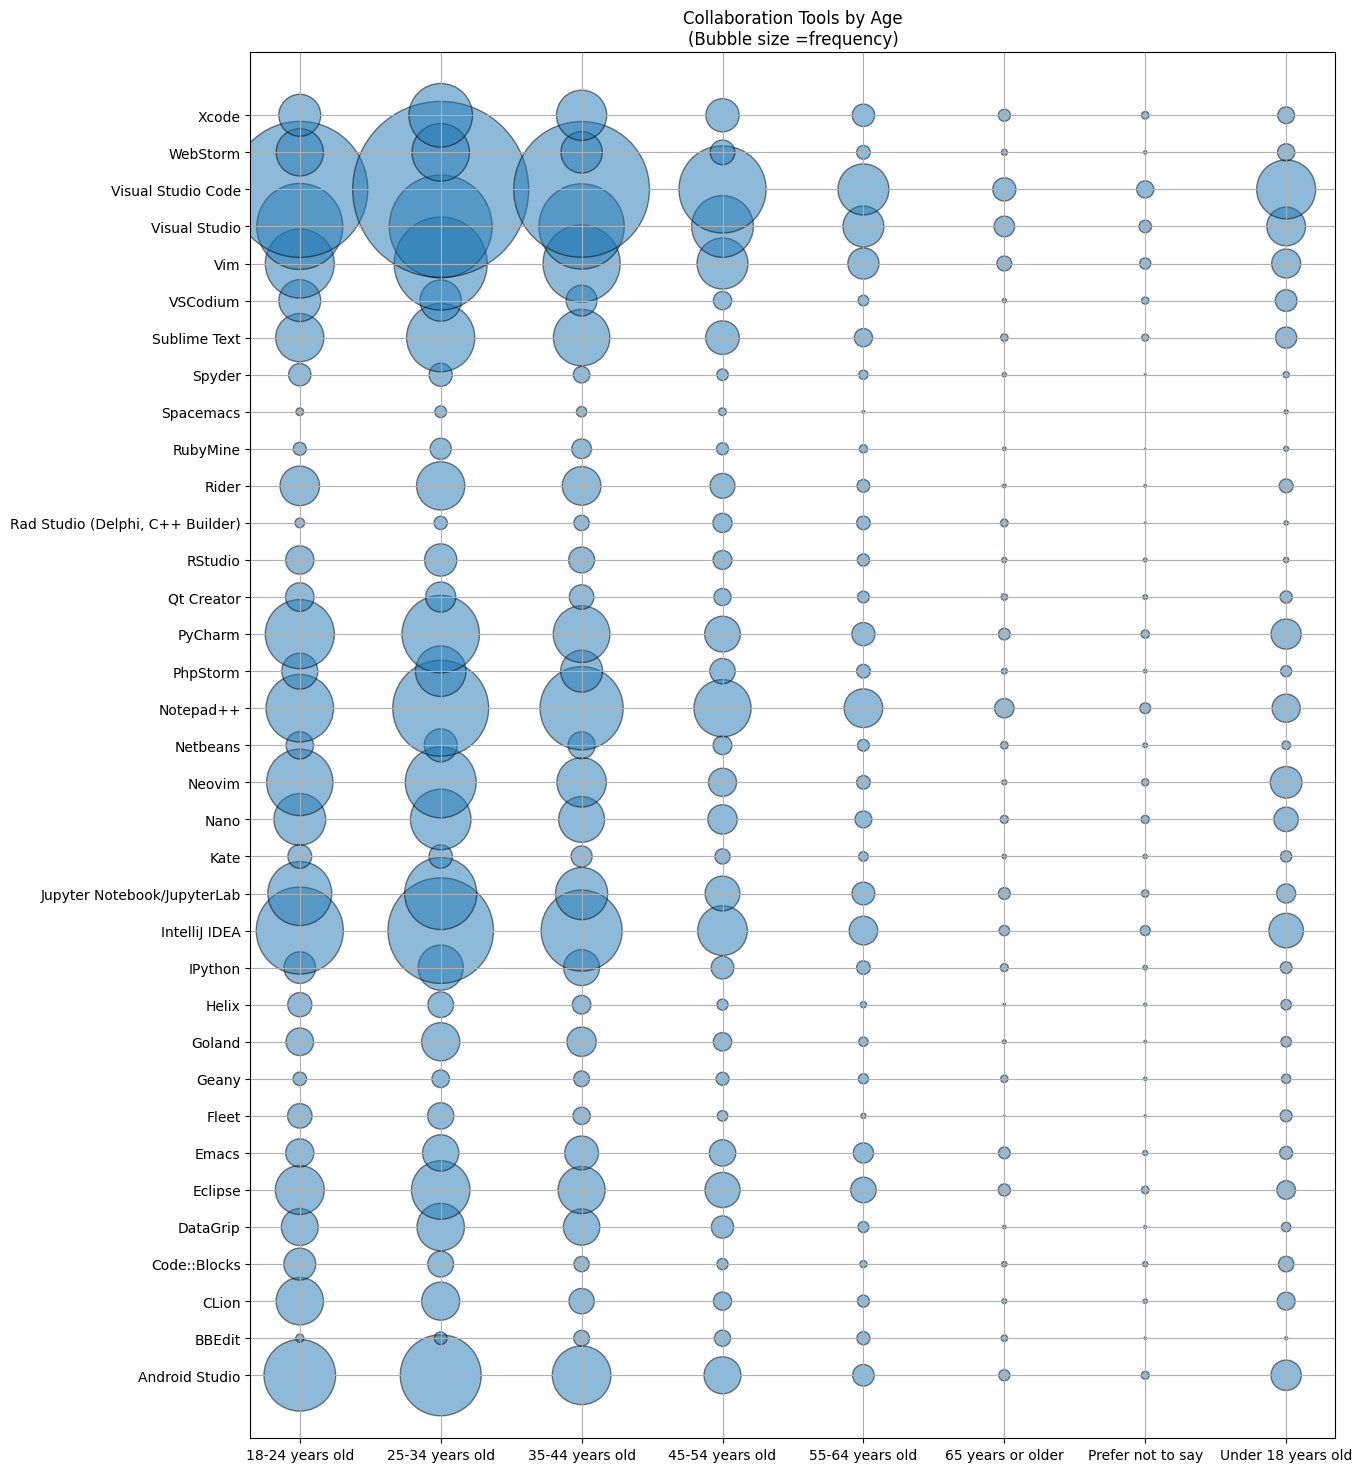

In [41]:
##Write your code here
df_tools = df.assign(tools=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('tools')
tools_age_freq = df_tools.groupby(['Age', 'tools']).size().reset_index(name='Count')
df_plot = tools_age_freq[['tools','Age','Count']].dropna()
df_plot
plt.figure(figsize=(14, 18))
plt.scatter(
    df_plot['Age'],
    df_plot['tools'],
    s=df_plot['Count'],  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Collaboration Tools by Age\n(Bubble size =frequency)')
plt.grid(True)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



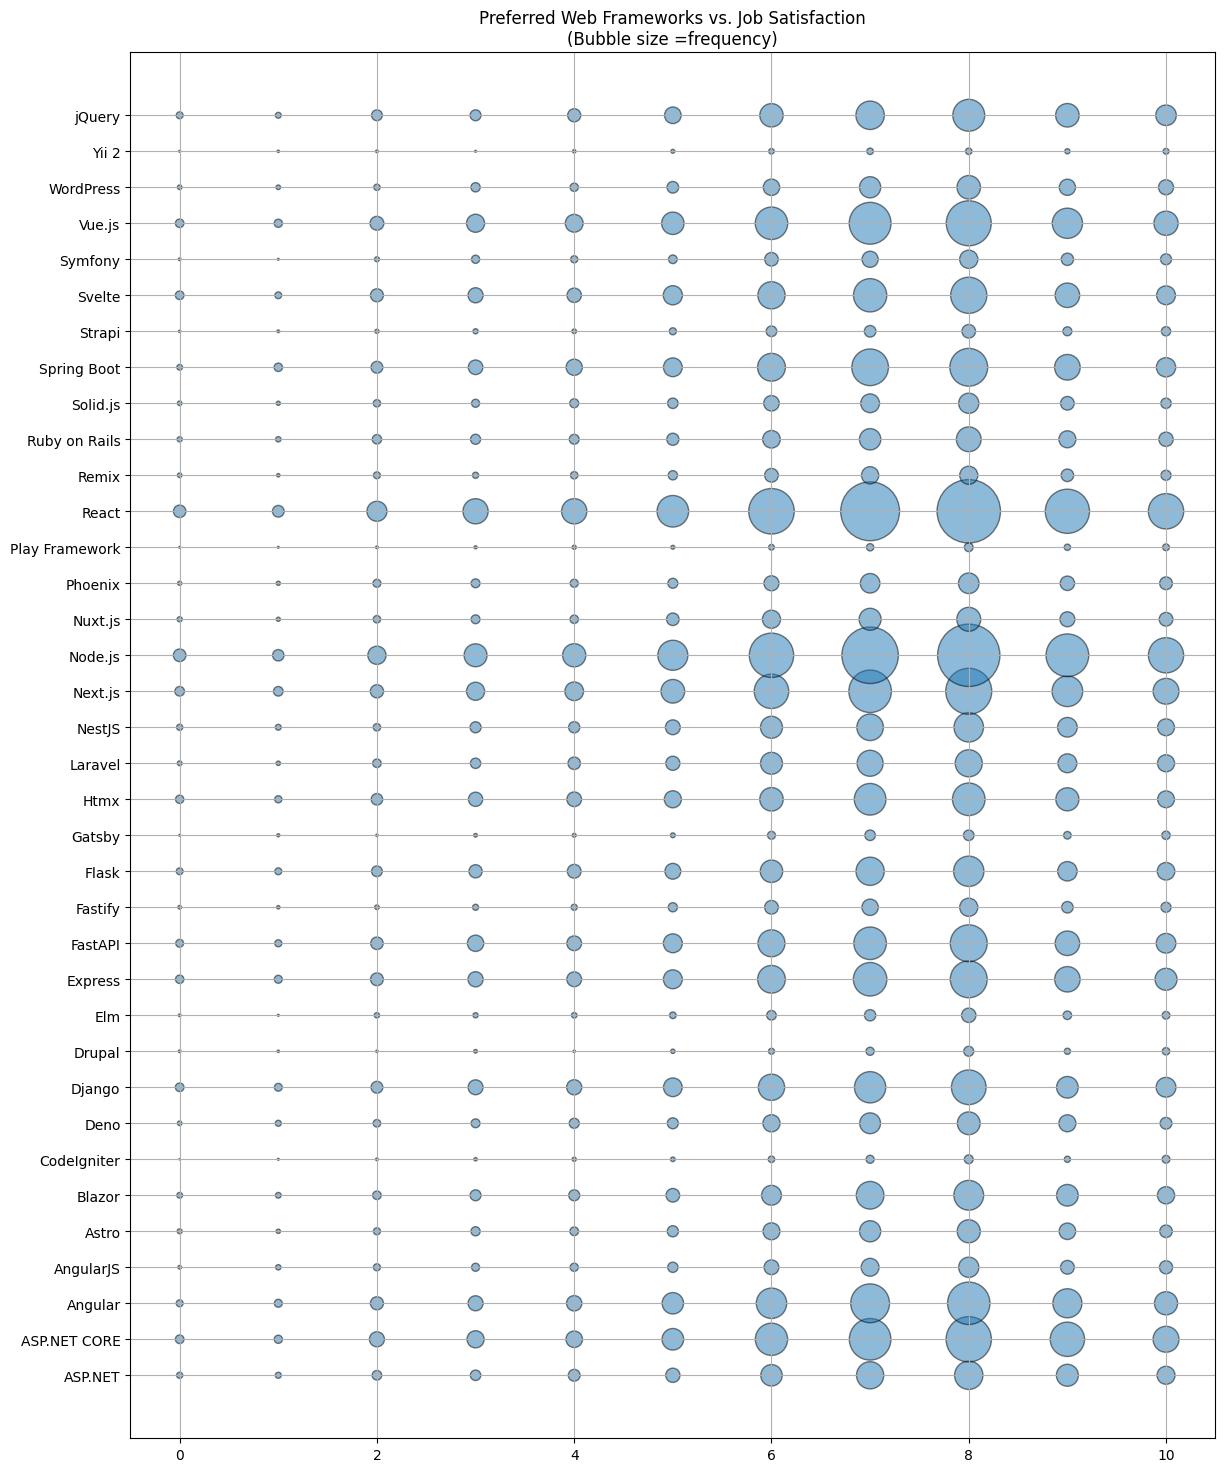

In [42]:
##Write your code here
df_wf = df.assign(webframe=df['WebframeWantToWorkWith'].str.split(';')).explode('webframe')
wf_jobsat_freq = df_wf.groupby(['JobSat', 'webframe']).size().reset_index(name='Count')
df_plot = wf_jobsat_freq[['webframe','JobSat','Count']].dropna()
df_plot
plt.figure(figsize=(14, 18))
plt.scatter(
    df_plot['JobSat'],
    df_plot['webframe'],
    s=df_plot['Count'],  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Preferred Web Frameworks vs. Job Satisfaction\n(Bubble size =frequency)')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



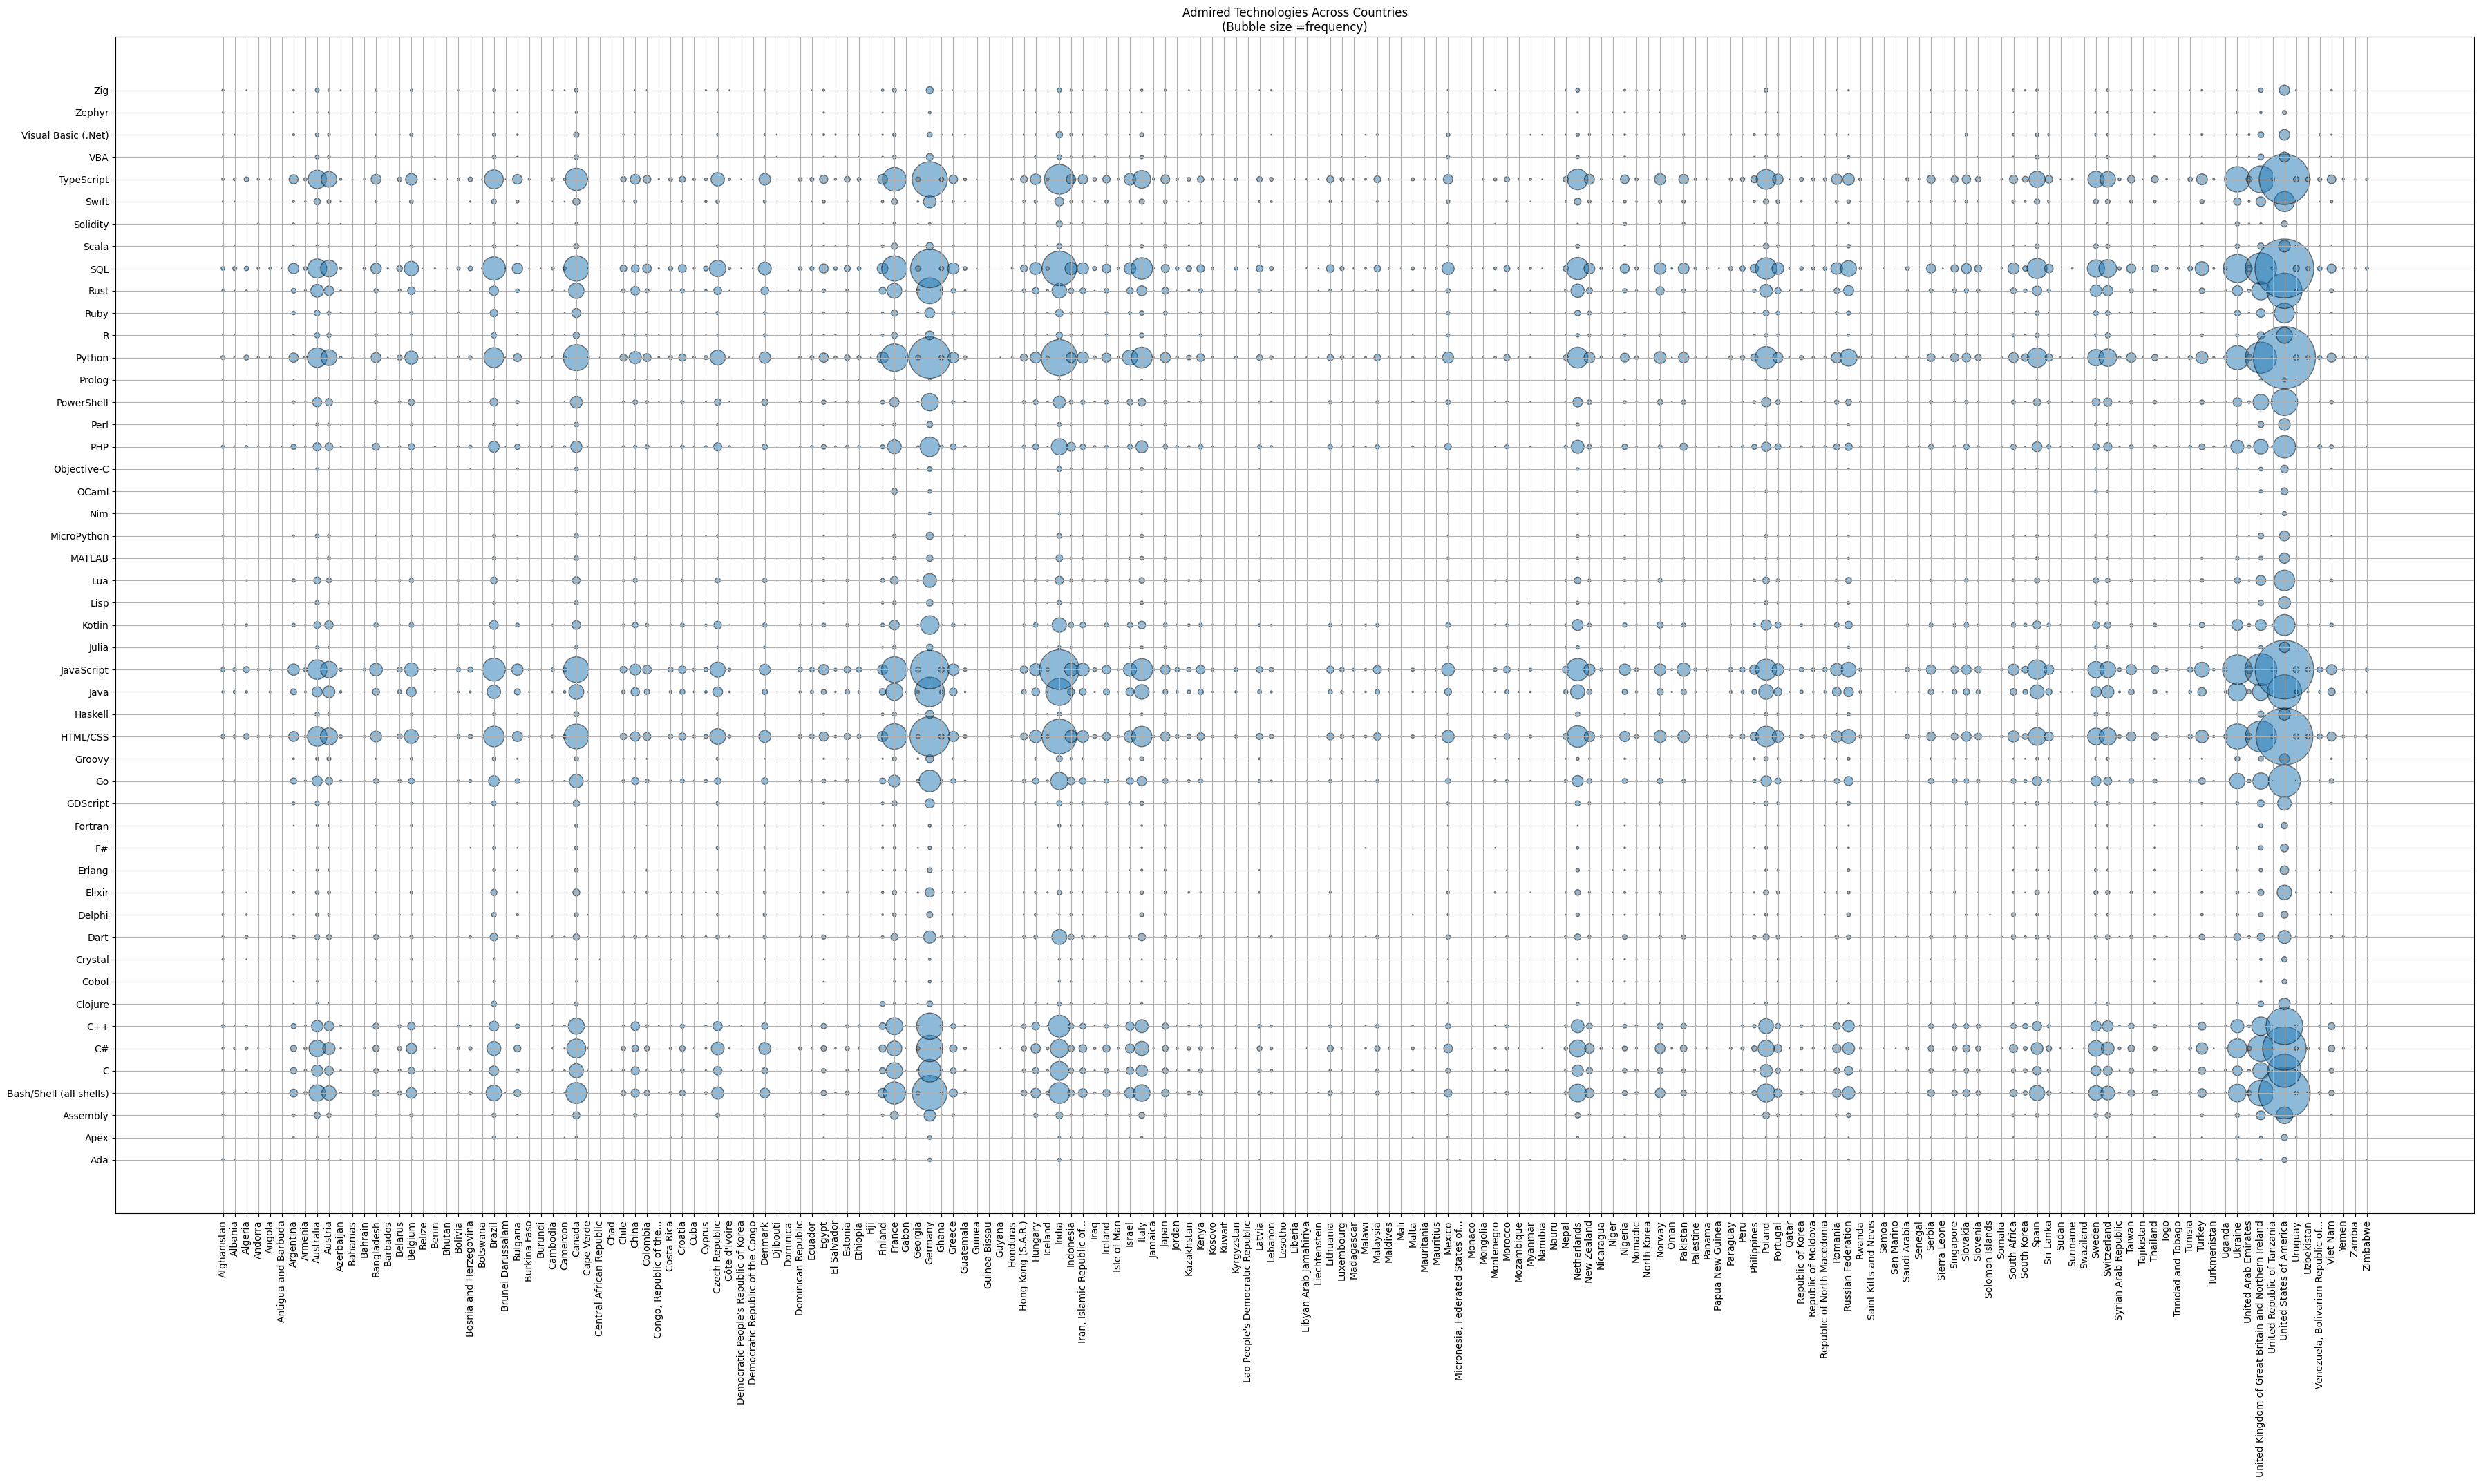

In [53]:
##Write your code here
df_admire = df.assign(langAdmire=df['LanguageAdmired'].str.split(';')).explode('langAdmire')
lang_country_freq = df_admire.groupby(['Country', 'langAdmire']).size().reset_index(name='Count')
df_plot = lang_country_freq[['langAdmire','Country','Count']].dropna()
df_plot
plt.figure(figsize=(36, 18))
plt.scatter(
    df_plot['Country'],
    df_plot['langAdmire'],
    s=df_plot['Count'],  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Admired Technologies Across Countries\n(Bubble size =frequency)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

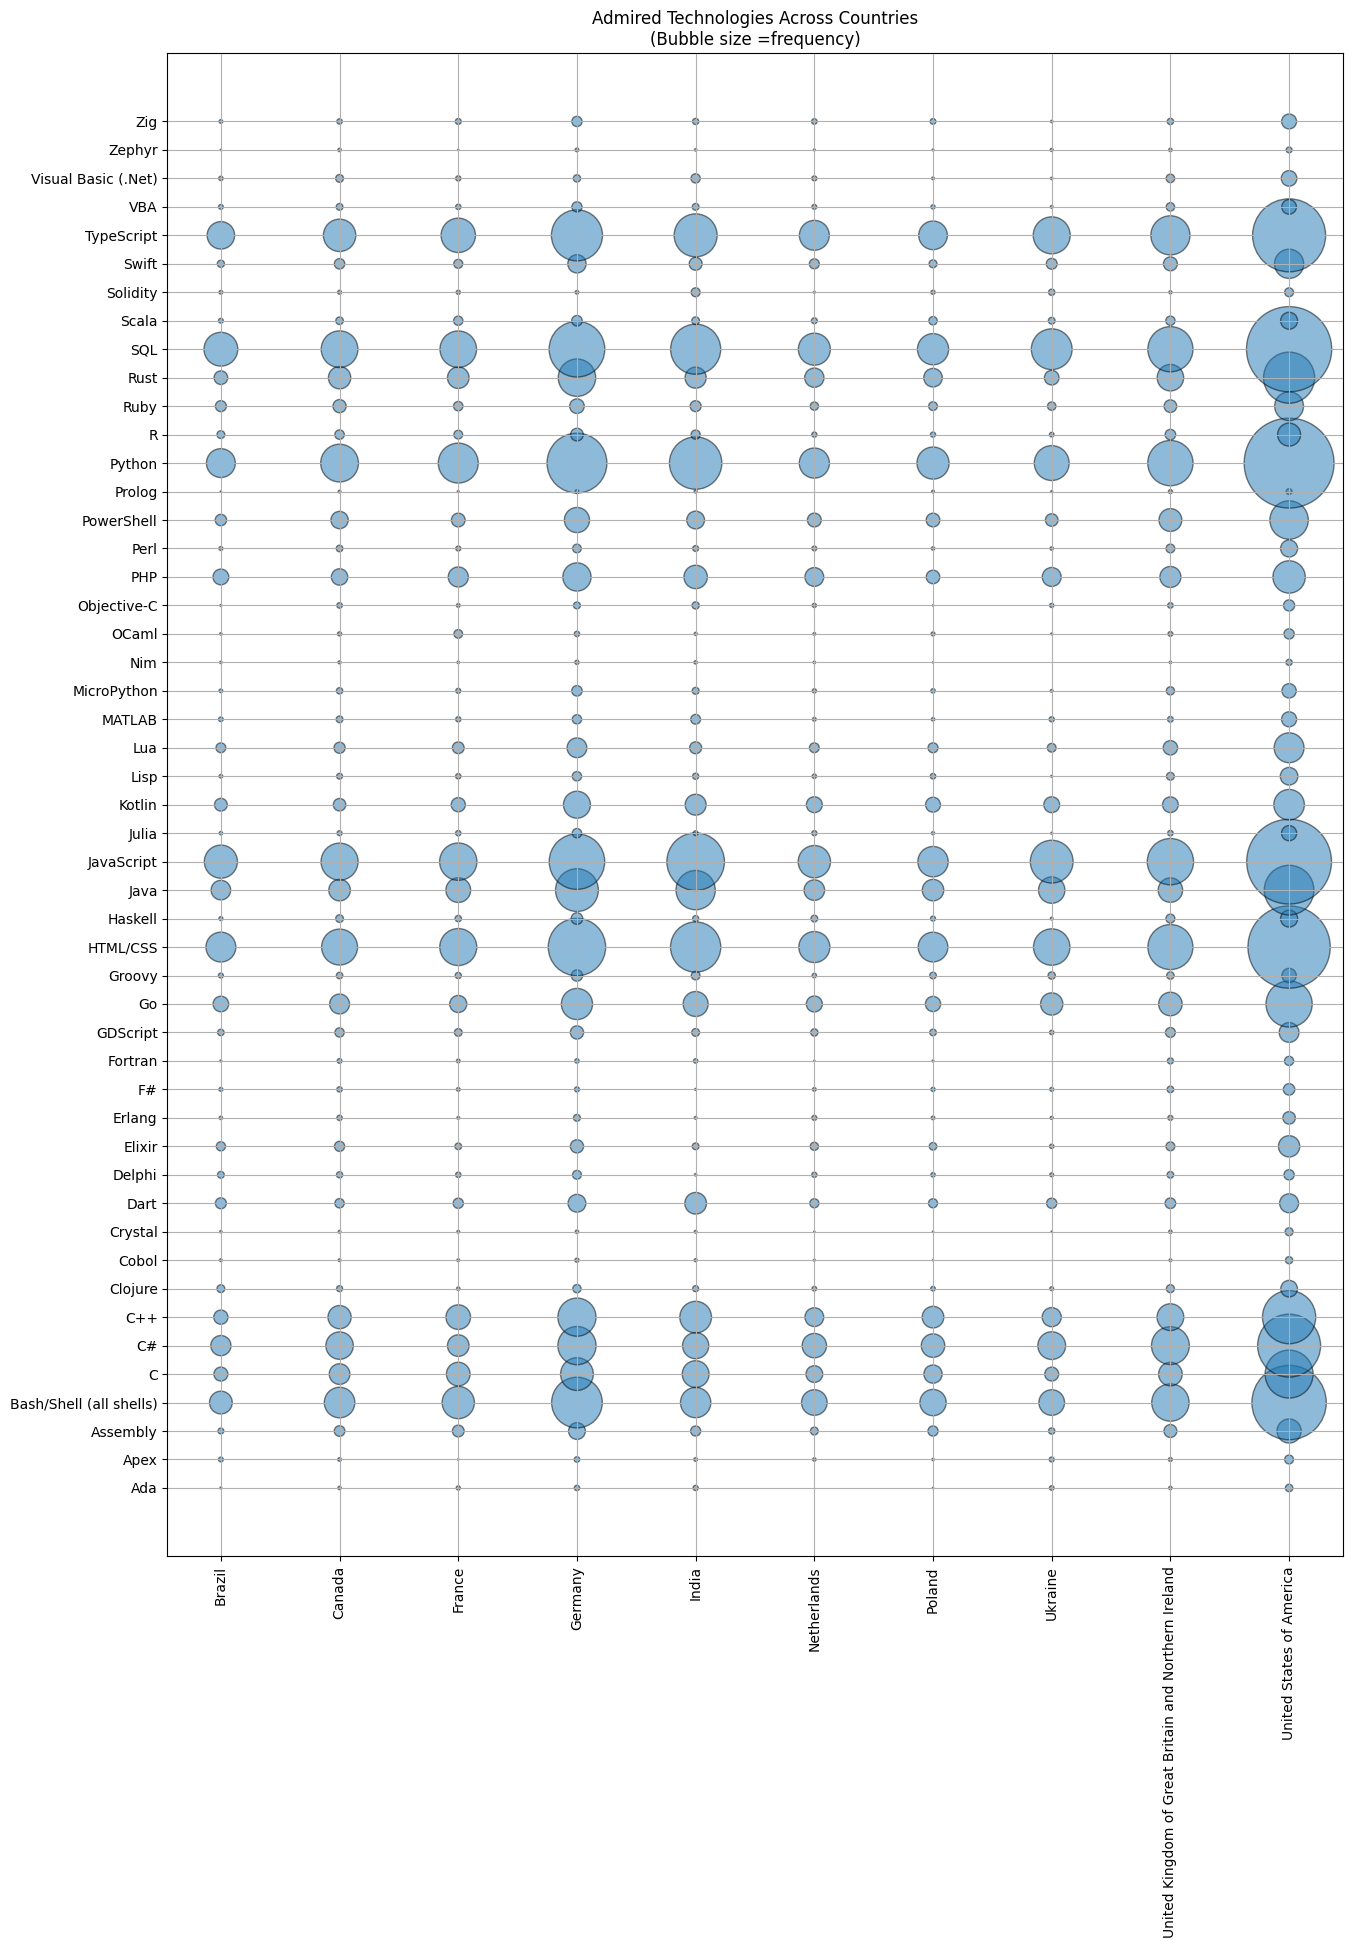

In [57]:
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]
df_admire = df_top.assign(langAdmire=df['LanguageAdmired'].str.split(';')).explode('langAdmire')
lang_country_freq = df_admire.groupby(['Country', 'langAdmire']).size().reset_index(name='Count')
df_plot = lang_country_freq[['langAdmire','Country','Count']].dropna()
df_plot
plt.figure(figsize=(14, 16))
plt.scatter(
    df_plot['Country'],
    df_plot['langAdmire'],
    s=df_plot['Count'],  # bubble size
    alpha=0.5,
    edgecolors='black'
)
plt.title('Admired Technologies Across Countries\n(Bubble size =frequency)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
